In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'ticks')
import pandas as pd

In [2]:
μ = 1.81 * 10**(-5)
w = 100 * 10**(-6)
h = 100 * 10**(-6)
L = 10**(-2)

In [3]:
p = [[213/256, 94/256, 0/256, 1], [0/256,114/256,178/256, 1]]

m = ['D', 'o']

d = [(2,2), (1,1)]

loc = '/Users/vishwavasani/Dropbox (GaTech)/Vishwa@GATech/Air Oscillator/Plots/Seaborn'

In [4]:
def eval_R_liq(μ, w, h, L):
    R = (12*μ*L)/(w*h**3)
    return R

In [5]:
Q_ul_min = np.linspace(0, 1000, 100)
Q = Q_ul_min*10**(-6)/60

In [6]:
P_atm = 101325
R = eval_R_liq(μ, w, h, L)
P = np.sqrt(P_atm**2 + 2*P_atm*Q*R)
P2 = P_atm + Q*R

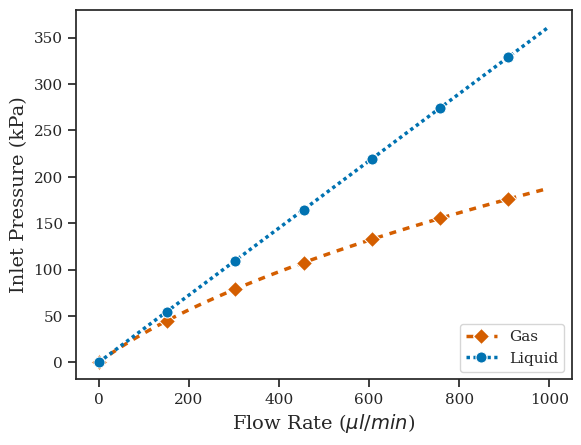

In [7]:
dat = np.transpose(np.array([(P - P_atm)/1000, (P2 - P_atm)/1000]))
data = pd.DataFrame(dat, Q_ul_min, columns = ['Gas', 'Liquid'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

sb.lineplot(data=data, palette = p, dashes = d, markers = m, 
            markevery=15, markersize = 8, linewidth=2.5)

plt.legend(loc = 4)
plt.xlabel('Flow Rate ($\mu l/min$)', size=14)
plt.ylabel('Inlet Pressure (kPa)', size = 14)

plt.savefig(loc + 'inlet_pressure.svg',dpi=400)

In [8]:
R_eff = R*(2*P_atm)/(P+P_atm)

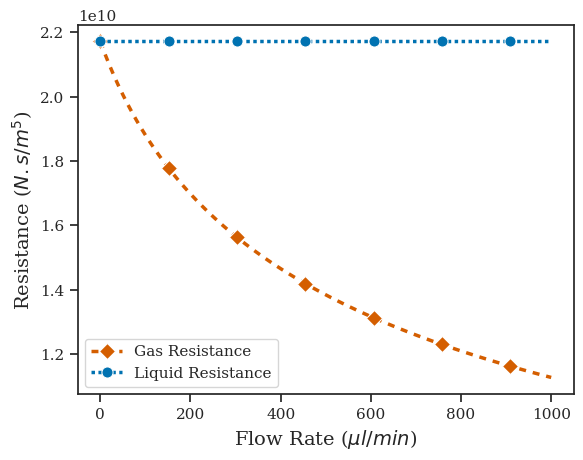

In [9]:
dat = np.transpose(np.array([R_eff, np.linspace(1,1,100)*R]))
data = pd.DataFrame(dat, Q_ul_min, columns = ['Gas Resistance', 'Liquid Resistance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

sb.lineplot(data=data, palette = p, dashes = d, markers = m, 
            markevery=15, markersize = 8, linewidth=2.5)

plt.legend()
plt.xlabel('Flow Rate ($\mu l/min$)', size=14)
plt.ylabel('Resistance ($N.s / m^5$)', size = 14)

plt.savefig(loc + 'resistance.svg',dpi=400)